# Ciele projektu

- importovanie datasetu
- analýza dát
- úprava dát
- rozdelenie dát na trénovacie a testovacie
- vytvorenie model pravdepodobnosti, že niekto dostane alebo má diabetes

V provom kroku si najprv zanalyzujeme náš dataset pomocou knižnice **pandas**. Ako tému sme si vybrali `'predpoved, že niekto dostane alebo má diabetes'`. Dataset môžeme nájsť na [tejto adrese](https://www.kaggle.com/uciml/pima-indians-diabetes-database) alebo na [gite](https://github.com/matebence/Mate_NS2020/blob/master/diabetes.csv).  Už samotný názov témy naznačuje, že ako dáta bude musieť analyzovať zdravotný stav ľudi ako mužov aj ženy v rôznom veku.

## Importovanie knižníc

In [1]:
# knižnice pre analýzu dát
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# knižnice pre získanie datasetu
import requests
import io

In [2]:
# kedže náš dataset sa už nachádza v našom git repozirátri, tak to využijeme a pomocou knižnice requests urobíme GET požiadavku na získanie datasetu
url = "https://raw.githubusercontent.com/matebence/Mate_NS2020/master/diabetes.csv"
response = requests.get(url).content
data_frame = pd.read_csv(io.StringIO(response.decode('utf-8')))

## Získanie informácií z metadát tabuľky

In [3]:
# náš dataset pozostáva z 768 riadkov a 9 stľpcov, kde shape[0] predstavuje riadky a shape[1] stľpce
data_frame.shape

(768, 9)

In [4]:
# názvy stľpcov ktorými budeme pracovať
data_frame.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Vysvetlenie význam stľpcov

- `Pregnancies (Tehotenstvo)` - Počet tehotenstiev
- `Glucose (Glukóza)` - Koncentrácia glukózy v plazme
- `BloodPressure (Krvný tlak)` - Krvný tlak (mm Hg)
- `SkinThickness (Hrúbka pokožky)` - Hrúbka záhybu pokožky (mm)
- `Insulin2-Hour (Inzulín)` - 2-hodinový sérový inzulín (mu U / ml)
- `BMI (Index telesnej hmotnosti)` - Index telesnej hmotnosti (hmotnosť v kg / (výška vm) ^ 2)
- `Age (Vek)` - Vek (roky)
- `Outcome (Výsledok)` - Premenná triedy výsledku (0 alebo 1) 268 z 768 je 1, ostatné sú 0

In [5]:
# dátové typy stľpcov
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# ukážka dát
data_frame.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# počet, priemer, max, min jednotlivých stľpcov
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Získanie kľúčových informácií 

- Histogram jednotlivých stľpcov
- Počet ludí ktorí majú diabetes
- Inzulín závislosti od hrúbky pokožky
- Stľpec výsledok závislosti od stľpca vek
- Stľpec výsledok závislosti od stľpca bmi

### Histogram jednotlivých stľpcov

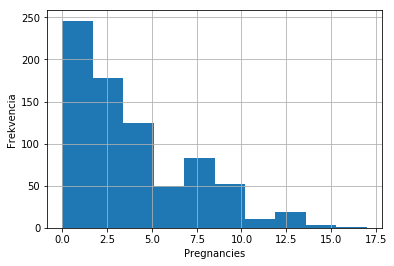

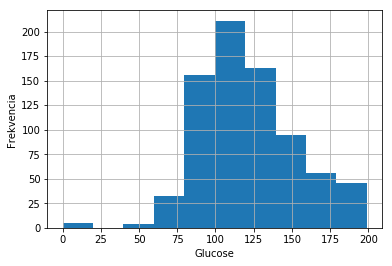

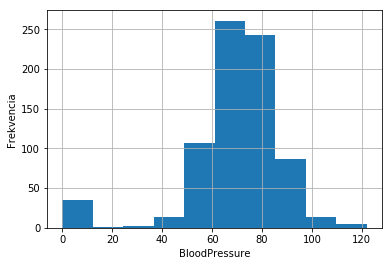

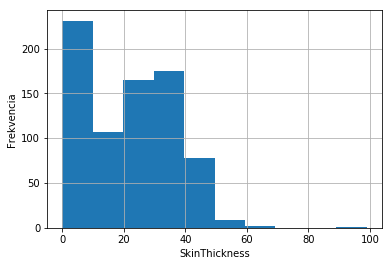

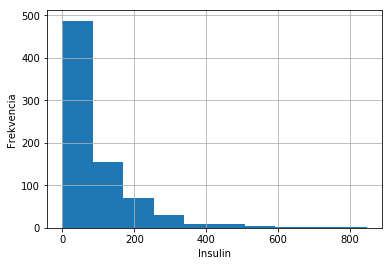

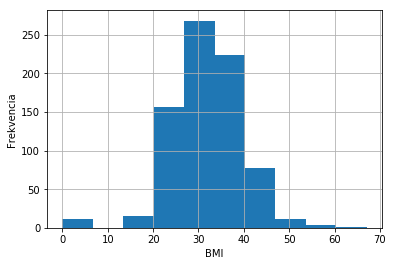

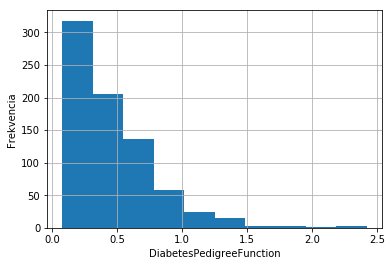

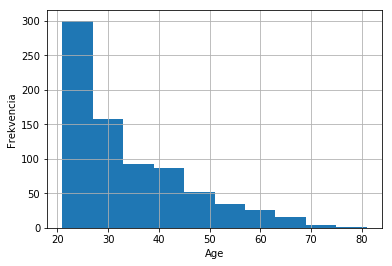

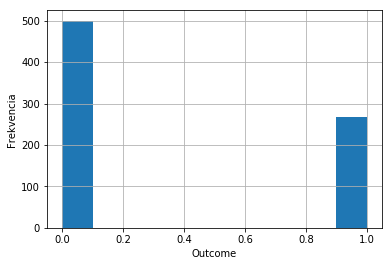

In [8]:
# znázornenie histogramu všetkých stľpcov po jednom by bolo náročne, tak využijeme naše programátorské znalosti a grafy plotneme pomocou for cyklu. Získanie názvy stľpcov sme už ukázali vyššie
for col in data_frame.columns:
    data_frame[col].hist()
    plt.xlabel(col)
    plt.ylabel("Frekvencia")
    plt.show()

### Počet ludí ktorí majú diabetes

Najdôležitejšie časti z kódu nižšie sú:

`'data_frame.Outcome.value_counts().plot.bar'` - získanie stľpca Outcome a počet hodnout pomocou count, následne vytvoriť **stľpcový graf**<br>
`'data_frame.Outcome.value_counts().plot.pie'` - získanie stľpca Outcome a počet hodnout pomocou count, následne vytvoriť **koláčový graf**

Všetko ostatné je iba nastovanie grafu pomocou **seaborn** dokumentáciu môžeme nájsť [tu](https://seaborn.pydata.org/).

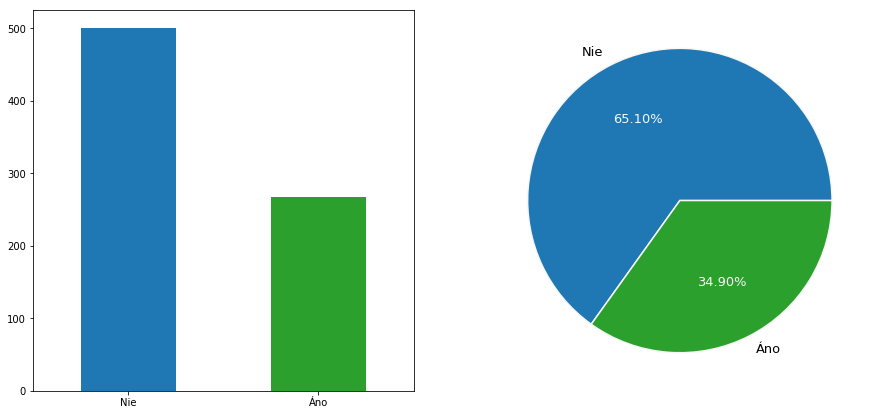

In [9]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
_ = data_frame.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["Nie", "Áno"])
_ = data_frame.Outcome.value_counts().plot.pie(labels = ("Nie", "Áno"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

### Inzulín závislosti od hrúbky pokožky

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


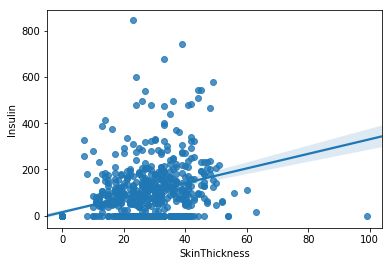

In [10]:
sns.regplot(x='SkinThickness', y= 'Insulin', data=data_frame)

### Stľpec výsledok závislosti od stľpca veku

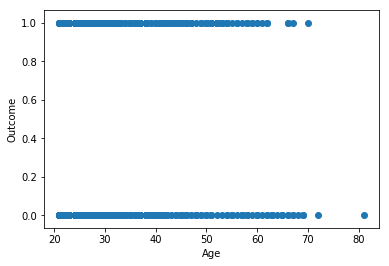

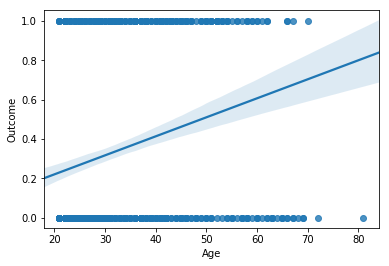

In [11]:
plt.scatter("Age","Outcome",data=data_frame)
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.show()

sns.regplot(x='Age', y= 'Outcome', data=data_frame)

### Stľpec výsledok závislosti od stľpca bmi

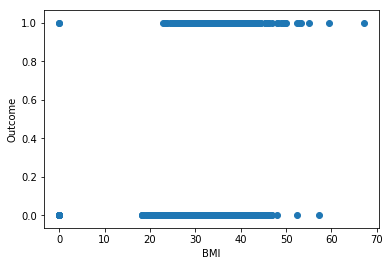

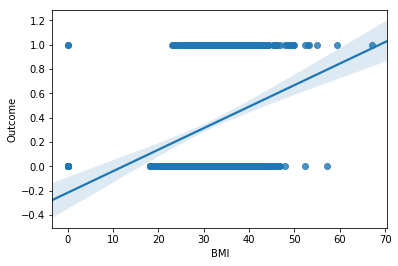

In [12]:
plt.scatter("BMI","Outcome",data=data_frame)
plt.xlabel("BMI")
plt.ylabel("Outcome")
plt.show()

sns.regplot(x='BMI', y= 'Outcome', data=data_frame)

### Zistenie závislostí medzi dátami

Seaborn vytvára takzvanú `'heatmap-type'` graf, ktorý každú hodnotu zo datasetu porovnáva s každou hodnotou aj sám so sebou. Potom sa zistí, či tieto dve hodnoty nejakým spôsobom navzájom súvisia.

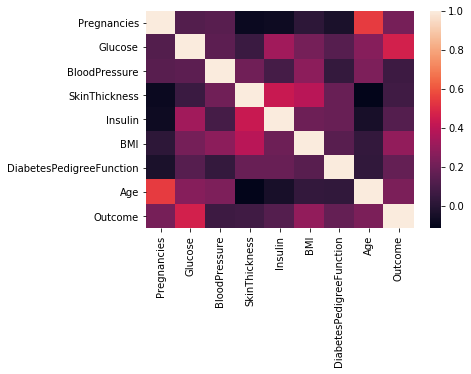

In [13]:
corr = data_frame.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### A nakoniec použijeme knižnicu seaborn pre znázornenie dát ako celok

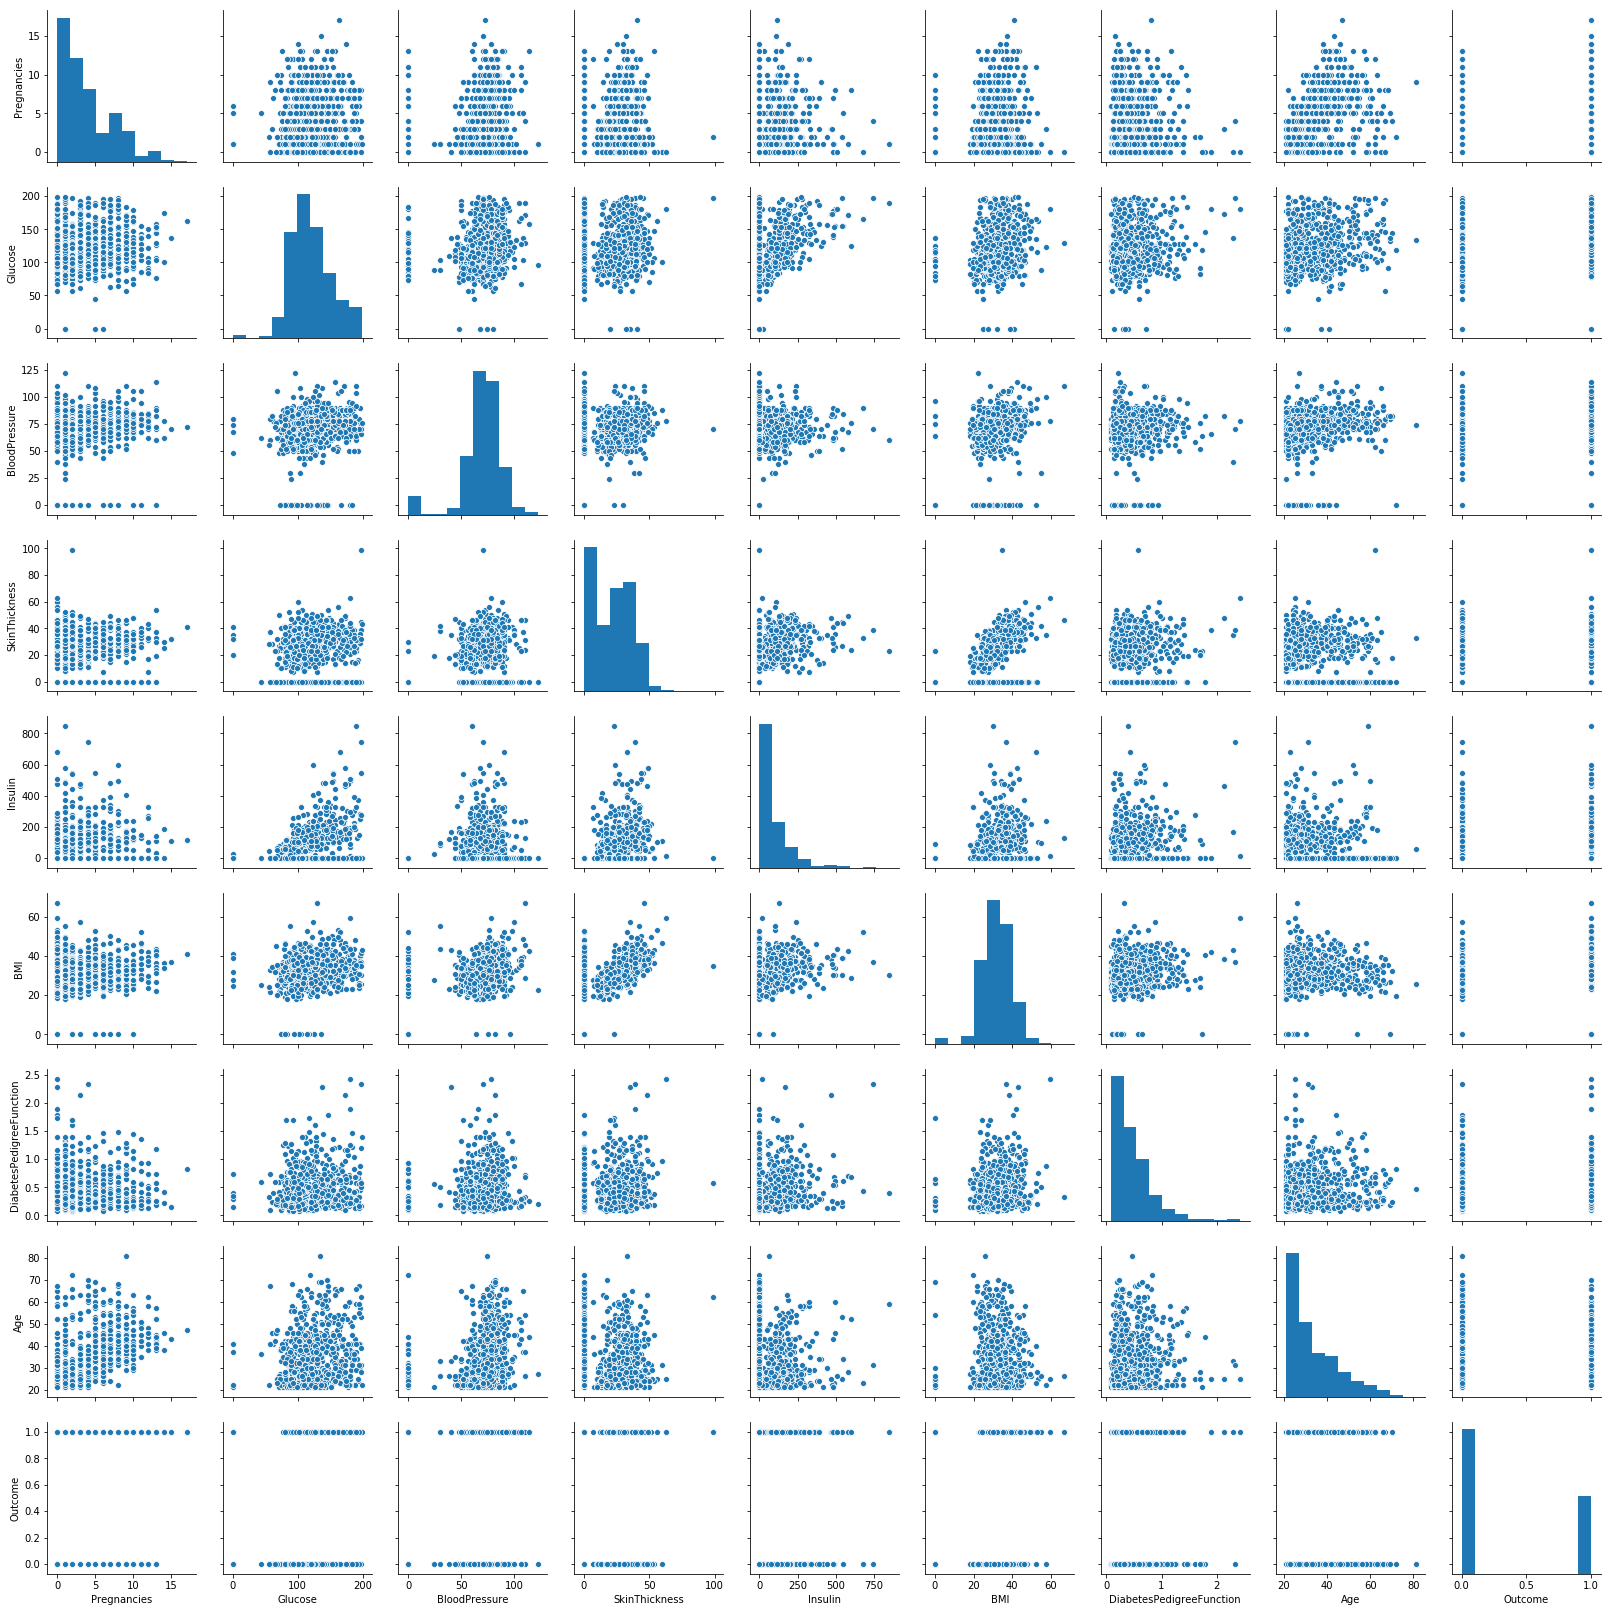

In [14]:
sns.pairplot(data_frame)

### Po analýze dát si posvietíme na správnosť dátových typov
 - Či všetky naše dáta sú numerické

In [15]:
issues = [var for var in data_frame.columns if data_frame[var].dtype=='O']
print("Problémové stľpce sú : ", issues)

## Po úprave dát si pohľadáme lineárne separovateľné dáta

- iba z tabuľky pomocou pandas je veľmi tažké určiť, že ktoré sú tie dáta
- pre vizualizáciu vyžijeme knižnicu **seaborn**

Problémové stľpce sú :  []


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


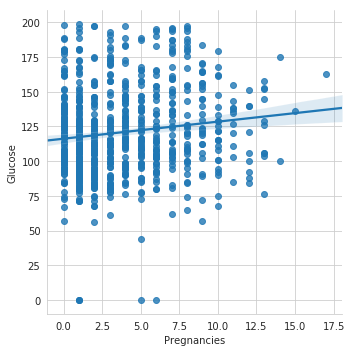

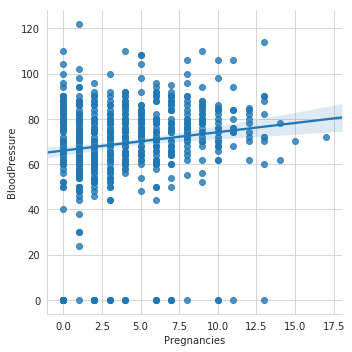

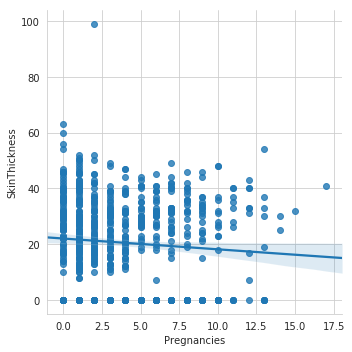

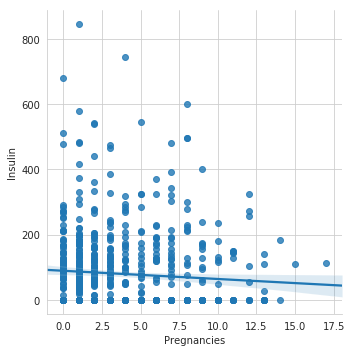

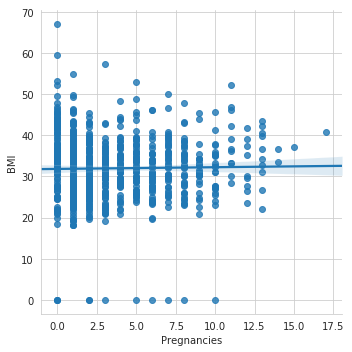

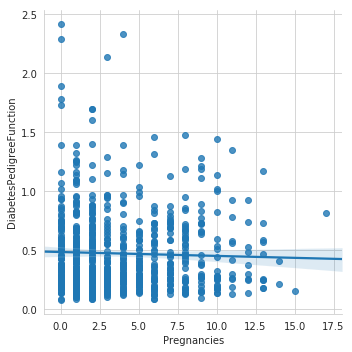

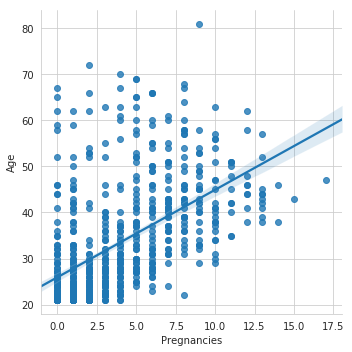

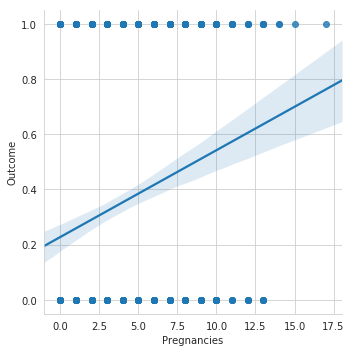

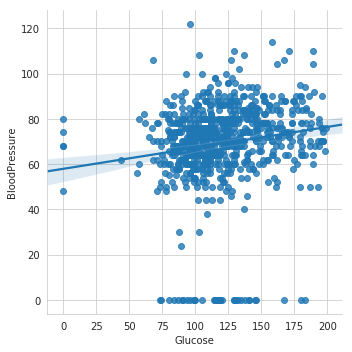

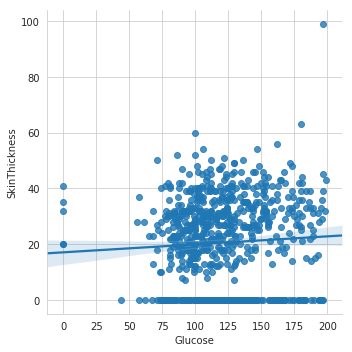

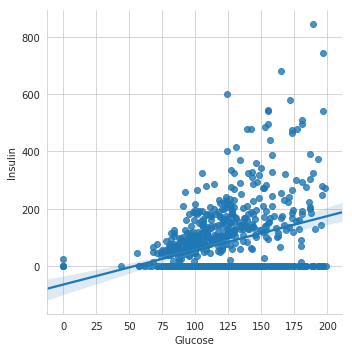

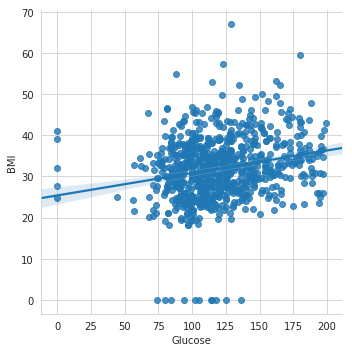

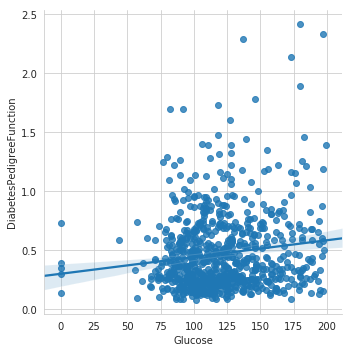

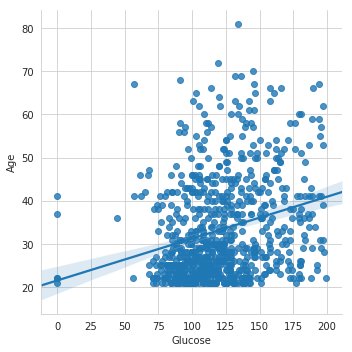

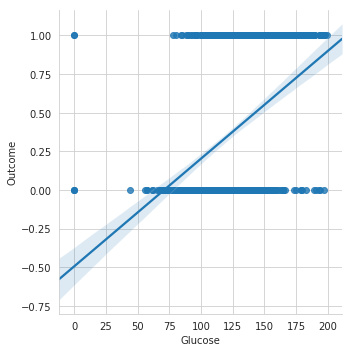

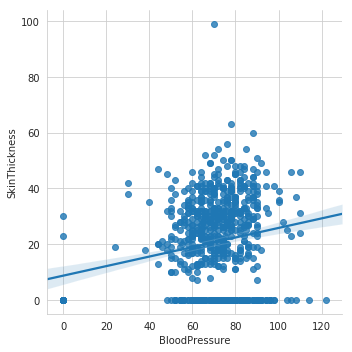

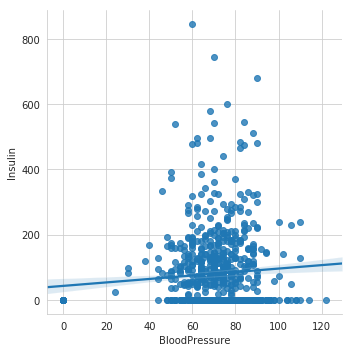

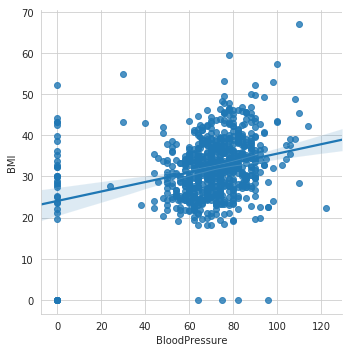

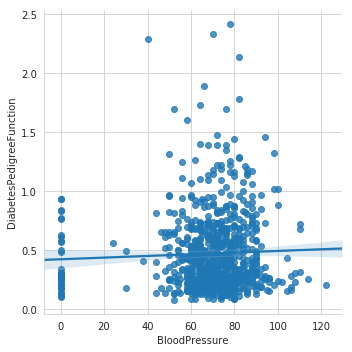

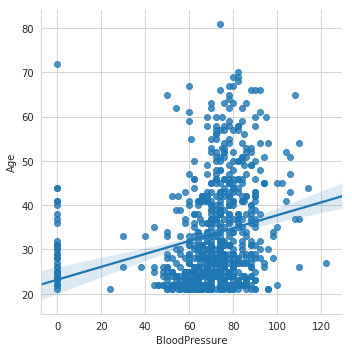

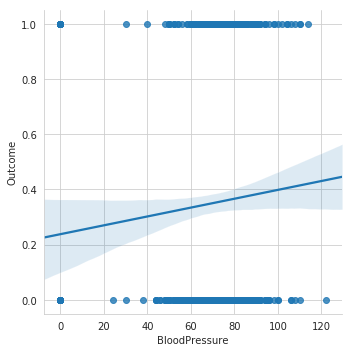

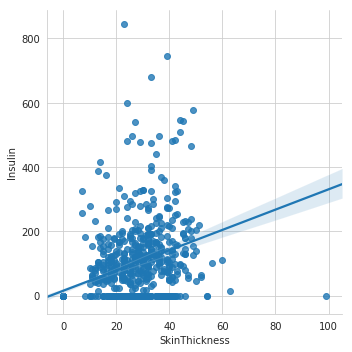

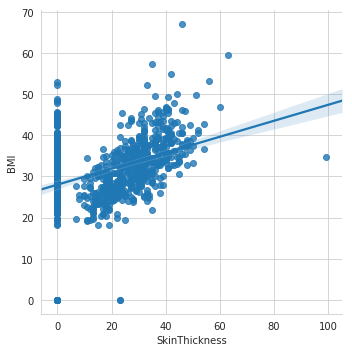

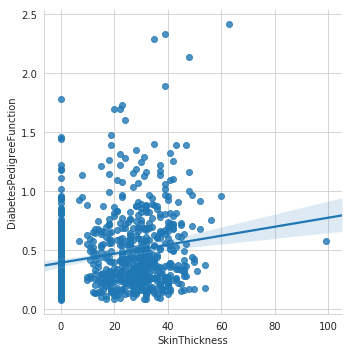

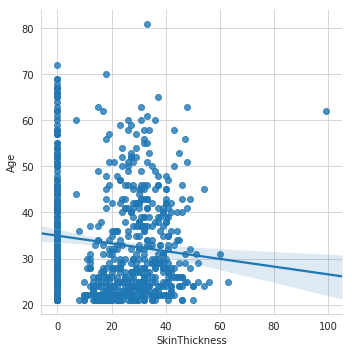

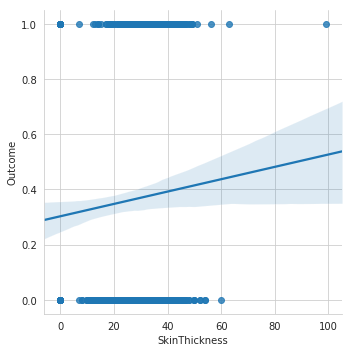

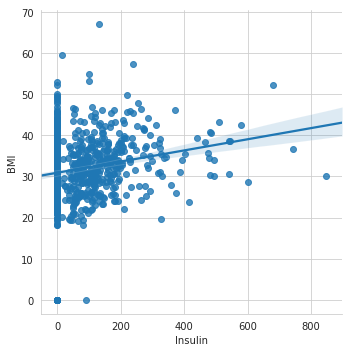

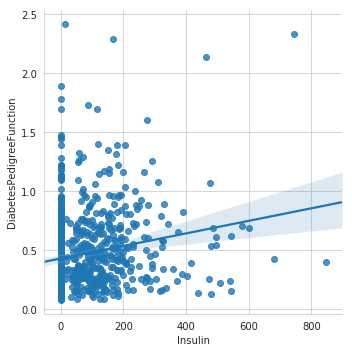

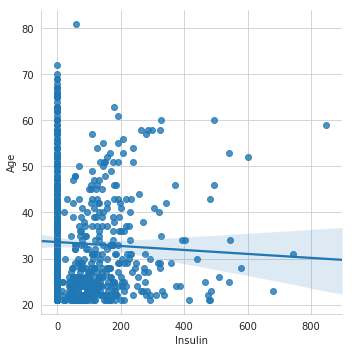

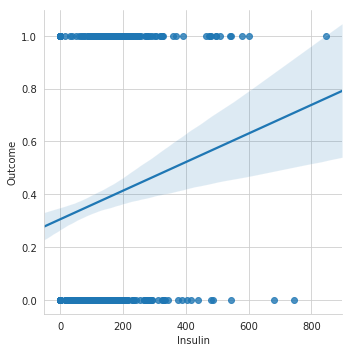

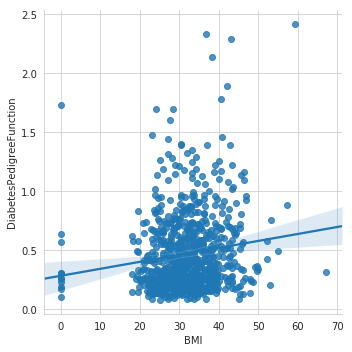

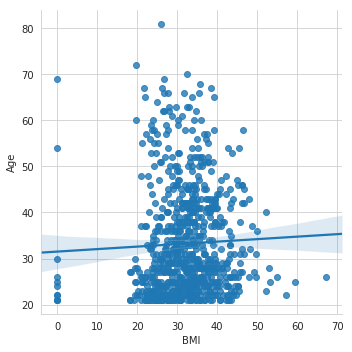

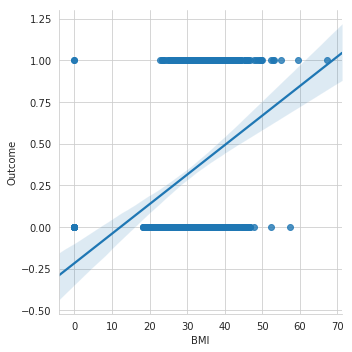

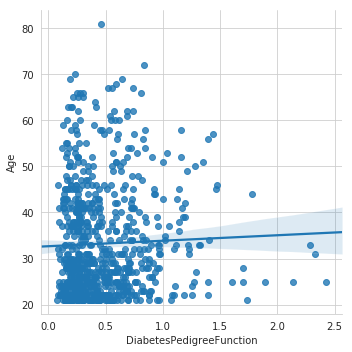

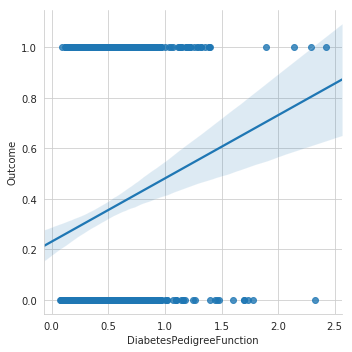

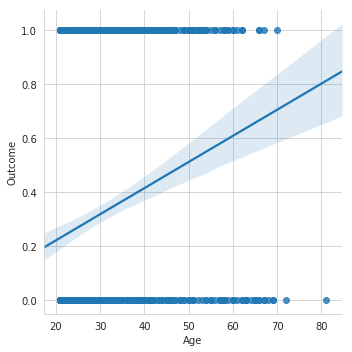

In [16]:
plotted = []
for col_out in data_frame.columns:
    for col_in in data_frame.columns:
        
        if col_out == col_in:
            continue
        if col_out+col_in in plotted:
            continue
            
        sns.set_style('whitegrid') 
        sns.lmplot(x =col_out, y =col_in, data = data_frame)
        
        plotted.append(col_out+col_in)
        plotted.append(col_in+col_out)

## Neurónová sieť

Našu neurónovú sieť postavíme pomocou knižnice **Keras**. Keras je API, ktoré je súčastou TensorFlow, Microsoft Cognitive Toolkit (CNTK) od spoločnosti Google, Microsoft a ďalších frameworkov strojového učenia.

In [17]:
# je to škalovacia knižnica, údaje transformuje tak, že ich distribúcia bude mať priemernú hodnotu 0 a smerodajnú odchýlku 1
from sklearn.preprocessing import StandardScaler

# train_test_split je funkcia z knižnice Sklearn na rozdelenie dát do dvoch podmnožín: na trénovacie a na testovacie
from sklearn.model_selection import train_test_split

# existujú dva spôsoby, ako zostaviť modely v Keras: sekvenčne a funkčne
#   sekvenčné - umožňuje vytvárať modely vrstvu po vrstve
#   funkčné   - majú oveľa väčšiu flexibilitu, pretože umožnujú definovať modely, k predchádzajúcim a aj k ďalším vrstvám
from keras.models import Sequential

# je to najčastejšie používaná vrstva. Vrstva vykoná nižšie uvedenú operáciu na vstupe a vráti výstup:
#    output = activation(dot(input, kernel) + bias)

#    input      - vstupné dáta
#    kernel     - váhy dát
#    dot        - numpy funkcia
#    bias       - hodnota bias, hodnota bias slúži na optimalizácu modelu
#    activation - aktivačná funkcia
from keras.layers import Dense

Using TensorFlow backend.


- Stľpec Outcome bude náš výstup(label)
- Ostatné stĺpce budú vstupy(feature)
- Pomocou funkcie scikit-learn train_test_split (X, y, test_size = 0,33, random_state = 42) sa údaje rozdelia na testovacie a trénovacie, pričom 33% záznamov sa pridelia do testovacieho pola. Trénovacie údaje sa používajú v metóde fit, čo znamená nájsť závažia a skreslenia. Testovacie údaje sa používajú na kontrolu jeho presnosti.
- premenné `labels` nie je pole, takže pomocou funkcie NumPy np.ravel () ju prevádzame na pole.

In [18]:
# rozdelenie dát na vstup(feature) a výstup(label)
labels=data_frame['Outcome']
features = data_frame.iloc[:,0:8]
X=features
y=np.ravel(labels)

In [19]:
# rozdelenie dát na trénovacie a testovacie
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
X_train[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,0,24.0,1.022,34
223,7,142,60,33,190,28.8,0.687,61
393,4,116,72,12,87,22.1,0.463,37
766,1,126,60,0,0,30.1,0.349,47
570,3,78,70,0,0,32.5,0.270,39


In [21]:
X_test[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [22]:
y_train[:5]

array([0, 0, 0, 1, 0])

In [23]:
y_test[:5]

array([0, 0, 0, 0, 0])

In [24]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [25]:
X_train[:5]

array([[ 1.89917664e+00, -1.94750933e-01,  1.55717838e+00,
        -1.32537379e+00, -6.85859549e-01, -1.04293476e+00,
         1.60661512e+00,  6.90585855e-02],
       [ 9.82865509e-01,  6.40463359e-01, -5.54961074e-01,
         8.05525757e-01,  9.58734921e-01, -4.14806202e-01,
         6.26098151e-01,  2.37289284e+00],
       [ 6.65543754e-02, -1.63817070e-01,  1.12030334e-01,
        -5.50501227e-01,  6.71916029e-02, -1.29156898e+00,
        -2.95311052e-02,  3.25040169e-01],
       [-8.49756758e-01,  1.45521556e-01, -5.54961074e-01,
        -1.32537379e+00, -6.85859549e-01, -2.44688051e-01,
        -3.63199566e-01,  1.17831211e+00],
       [-2.38882669e-01, -1.33930385e+00,  8.65099101e-04,
        -1.32537379e+00, -6.85859549e-01,  6.93762291e-02,
        -5.94425956e-01,  4.95694558e-01]])

In [26]:
X_test[:5]

array([[ 0.67742846, -0.7206266 , -0.66612631,  0.80552576,  0.95873492,
         0.2656664 , -0.12611934,  0.83700334],
       [-0.54431971, -0.28755252,  0.27877819,  0.74095304, -0.68585955,
         0.4881286 , -0.95150975, -1.04019494],
       [-0.54431971, -0.41128797, -0.3326306 , -1.32537379, -0.68585955,
        -0.15308597, -0.92224058, -1.04019494],
       [ 1.28830255, -0.44222183,  0.55669127, -1.32537379, -0.68585955,
        -0.96441869,  1.12074701,  0.06905859],
       [ 0.98286551,  0.45486018,  1.11251744, -1.32537379, -0.68585955,
        -0.27086007, -0.77004093,  1.4342937 ]])

- V ďalšom kroku si vyberieme aktivačnú funkciu pre každu vrstvu. Kde ((w • x) + b) vypočíta pravdepodobnosť. Potom nastavíme threshold(prah, začiatok), aby určil, či má byť neurón ((w • x) + b) 1 (true) alebo 0 (false)
- pre prvé dve vrstvy používame aktivačnú funkciu relu. Relu je 1 pre všetky pozitívne hodnoty a 0 pre všetky negatívne hodnoty
- Prvým argumentom funkcie Dense je počet skrytých jednotiek, čo je parameter, ktorý môžeme upraviť, aby sme zlepšili presnosť modelu

In [27]:
# vytvorenie modelu
model = Sequential()
# vstupná vrstva
# features.shape[1] - znamena počet stľpcov ciže 8, spolu sme mali 9. 1 výstup, 8 vstupov
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
# skryta vrstva
model.add(Dense(8, activation='relu'))
# vystupná vrstva
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


Metódy fit a compile boli nastavené pomocou dokumentácie keras.

- Všetky optimizre môžeme nájsť na tejto [adrese](https://keras.io/optimizers/)
- Všetky stratové(loss) funkcie môžeme najsť na tejto [adrese](https://keras.io/losses/)
- Argumenty pre metódu compile [tu](https://keras.io/models/sequential/#compile)
- A pre metódu fit [tu](https://keras.io/models/sequential/#fit)

## SGD

`keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)`

In [28]:
# kompolivanie modelu
# loss      - skalárna hodnota, ktorú sa počas tréningu modelu snažíme minimalizovať. Tieto funkcie ako 'mse' sú kerasom vopred definované
#            - my sme si zvolili binary_crossentropy pretože naše dáta sú binárne 0, 1
# optimizer - optimalizačný model na výber máme aj ďalšie ako SGD, RMSprop, Adagrad
# metrics   - zoznam metrík, ktoré má model vyhodnotiť počas testovania.
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# trénovanie modelu
# X_train, y_train - sú to naše dáta
# epoch            - počet iterácií
# batch_size       - definuje počet vzoriek, ktoré sa budú šíriť prostredníctvom siete.
# verbose          - hodnota môže byť 0, 1, 2. Ovplyvňuje detailnosť výstupu ktorú vidíme nižšie
# validation_split - hodnota medzi 0 a 1. Model oddeľuje túto časť tréningových údajov, nebude ju trénovať a na konci každej iterácie vyhodnotí stratu a akékoľvek modelové metriky.
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/4
514/514 [==============================] - 3s 5ms/step - loss: 0.6013 - accuracy: 0.6829
Epoch 2/4
514/514 [==============================] - 4s 7ms/step - loss: 0.5175 - accuracy: 0.7685
Epoch 3/4
514/514 [==============================] - 2s 4ms/step - loss: 0.4832 - accuracy: 0.7626
Epoch 4/4
514/514 [==============================] - 2s 4ms/step - loss: 0.4640 - accuracy: 0.7763


In [29]:
for layer in model.layers:
    weights = layer.get_weights()
weights

[array([[-0.18085971],
        [ 0.8362995 ],
        [-0.5792796 ],
        [-0.6820563 ],
        [-0.14595555],
        [ 0.30219367],
        [-0.5352867 ],
        [-0.62698615]], dtype=float32), array([-0.22320548], dtype=float32)]

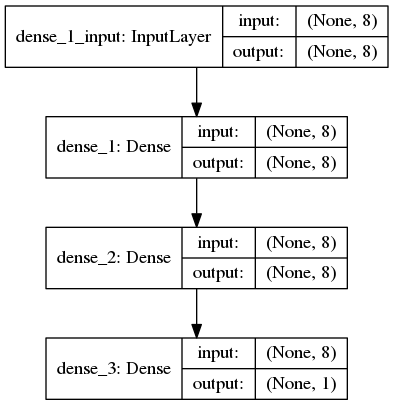

In [30]:
# grafické znázornenie neurónovej siete pomocou subknižnice keras.utils
from keras.utils import plot_model
plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

In [31]:
y_pred = model.predict_classes(X_test)

In [32]:
# úspešnosť neurónovej siete
score = model.evaluate(X_test, y_test,verbose=1)
score

254/254 [==============================] - 0s 808us/step


[0.48729539058339877, 0.7795275449752808]

In [33]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 3s 5ms/step - loss: 0.6357 - accuracy: 0.6401
Epoch 2/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5409 - accuracy: 0.7257
Epoch 3/4
514/514 [==============================] - 2s 4ms/step - loss: 0.4906 - accuracy: 0.7549
Epoch 4/4
514/514 [==============================] - 2s 4ms/step - loss: 0.4684 - accuracy: 0.7568


## Ďalej zistíme úspešnosť siete ďalšimi optimizermi

In [35]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


## RMSprop

`keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)`

In [36]:
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 2s 5ms/step - loss: 0.6775 - accuracy: 0.6109
Epoch 2/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5726 - accuracy: 0.7276
Epoch 3/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5195 - accuracy: 0.7549
Epoch 4/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5013 - accuracy: 0.7646


In [37]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 3s 5ms/step - loss: 0.6418 - accuracy: 0.6459
Epoch 2/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5453 - accuracy: 0.7198
Epoch 3/4
514/514 [==============================] - 2s 4ms/step - loss: 0.4952 - accuracy: 0.7510
Epoch 4/4
514/514 [==============================] - 2s 5ms/step - loss: 0.4805 - accuracy: 0.7646


In [39]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


## Adagrad

`keras.optimizers.Adagrad(learning_rate=0.01)`

In [40]:
model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 3s 5ms/step - loss: 0.6442 - accuracy: 0.6595
Epoch 2/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5686 - accuracy: 0.6887
Epoch 3/4
514/514 [==============================] - 2s 3ms/step - loss: 0.5328 - accuracy: 0.7140
Epoch 4/4
514/514 [==============================] - 2s 3ms/step - loss: 0.5114 - accuracy: 0.7393


In [41]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 3s 5ms/step - loss: 0.6032 - accuracy: 0.6537
Epoch 2/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5538 - accuracy: 0.7062
Epoch 3/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5322 - accuracy: 0.7198
Epoch 4/4
514/514 [==============================] - 2s 5ms/step - loss: 0.5162 - accuracy: 0.7296


In [43]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


## Adadelta

`keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)`

In [44]:
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 3s 6ms/step - loss: 0.6499 - accuracy: 0.6420
Epoch 2/4
514/514 [==============================] - 2s 5ms/step - loss: 0.5950 - accuracy: 0.6887
Epoch 3/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5477 - accuracy: 0.7315
Epoch 4/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5039 - accuracy: 0.7685


In [45]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 3s 6ms/step - loss: 0.6893 - accuracy: 0.5934
Epoch 2/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5922 - accuracy: 0.6946
Epoch 3/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5336 - accuracy: 0.7043
Epoch 4/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5056 - accuracy: 0.7354


In [47]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


## Adam

`keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)`

In [48]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 3s 5ms/step - loss: 0.6082 - accuracy: 0.6323
Epoch 2/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5327 - accuracy: 0.6770
Epoch 3/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5031 - accuracy: 0.7296
Epoch 4/4
514/514 [==============================] - 2s 4ms/step - loss: 0.4820 - accuracy: 0.7646


In [49]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 4s 7ms/step - loss: 0.6687 - accuracy: 0.6265
Epoch 2/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5452 - accuracy: 0.7218
Epoch 3/4
514/514 [==============================] - 2s 4ms/step - loss: 0.4717 - accuracy: 0.7568
Epoch 4/4
514/514 [==============================] - 2s 4ms/step - loss: 0.4487 - accuracy: 0.7763


In [51]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


## Adamax

`keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)`

In [52]:
model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 3s 6ms/step - loss: 0.7047 - accuracy: 0.5214
Epoch 2/4
514/514 [==============================] - 2s 4ms/step - loss: 0.6150 - accuracy: 0.6459
Epoch 3/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5739 - accuracy: 0.6595
Epoch 4/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5463 - accuracy: 0.6829


In [53]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_40 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 4s 7ms/step - loss: 0.6516 - accuracy: 0.6693
Epoch 2/4
514/514 [==============================] - 2s 5ms/step - loss: 0.5747 - accuracy: 0.7276
Epoch 3/4
514/514 [==============================] - 2s 4ms/step - loss: 0.5124 - accuracy: 0.7549
Epoch 4/4
514/514 [==============================] - 2s 5ms/step - loss: 0.4843 - accuracy: 0.7704


In [55]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


## Nadam

`keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)`

In [56]:
model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 3s 6ms/step - loss: 0.6162 - accuracy: 0.6595
Epoch 2/4
514/514 [==============================] - 2s 5ms/step - loss: 0.5095 - accuracy: 0.7432
Epoch 3/4
514/514 [==============================] - 2s 4ms/step - loss: 0.4763 - accuracy: 0.7646
Epoch 4/4
514/514 [==============================] - 2s 4ms/step - loss: 0.4606 - accuracy: 0.7802


In [57]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 4s 8ms/step - loss: 0.6023 - accuracy: 0.6693
Epoch 2/4
514/514 [==============================] - 3s 5ms/step - loss: 0.4807 - accuracy: 0.7568
Epoch 3/4
514/514 [==============================] - 2s 5ms/step - loss: 0.4561 - accuracy: 0.7665
Epoch 4/4
514/514 [==============================] - 3s 5ms/step - loss: 0.4479 - accuracy: 0.7840


## Ďalej zistíme úspešnosť siete ďalšimi skritými vrstvami a s hodnotou iterácie 100

In [59]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_51 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_52 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_53 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_54 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_55 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_56 (Dense)             (None, 8)               

In [60]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=100, batch_size=1, verbose=1)

Epoch 1/100
514/514 [==============================] - 7s 13ms/step - loss: 0.5982 - accuracy: 0.6595
Epoch 2/100
514/514 [==============================] - 4s 7ms/step - loss: 0.5101 - accuracy: 0.7471
Epoch 3/100
514/514 [==============================] - 4s 7ms/step - loss: 0.4736 - accuracy: 0.7626
Epoch 4/100
514/514 [==============================] - 3s 6ms/step - loss: 0.4621 - accuracy: 0.7626
Epoch 5/100
514/514 [==============================] - 3s 7ms/step - loss: 0.4509 - accuracy: 0.7704
Epoch 6/100
514/514 [==============================] - 4s 7ms/step - loss: 0.4388 - accuracy: 0.7899
Epoch 7/100
514/514 [==============================] - 3s 6ms/step - loss: 0.4440 - accuracy: 0.7899
Epoch 8/100
514/514 [==============================] - 3s 6ms/step - loss: 0.4364 - accuracy: 0.7899
Epoch 9/100
514/514 [==============================] - ETA: 0s - loss: 0.4255 - accuracy: 0.79 - 3s 7ms/step - loss: 0.4290 - accuracy: 0.7977
Epoch 10/100
514/514 [==========================

In [61]:
for layer in model.layers:
    weights = layer.get_weights()
weights

[array([[-0.7363464 ],
        [-0.5993834 ],
        [ 0.29992804],
        [ 1.0065149 ],
        [ 0.548742  ],
        [ 0.45394707],
        [-0.40410227],
        [-0.5048116 ]], dtype=float32), array([-0.04228292], dtype=float32)]

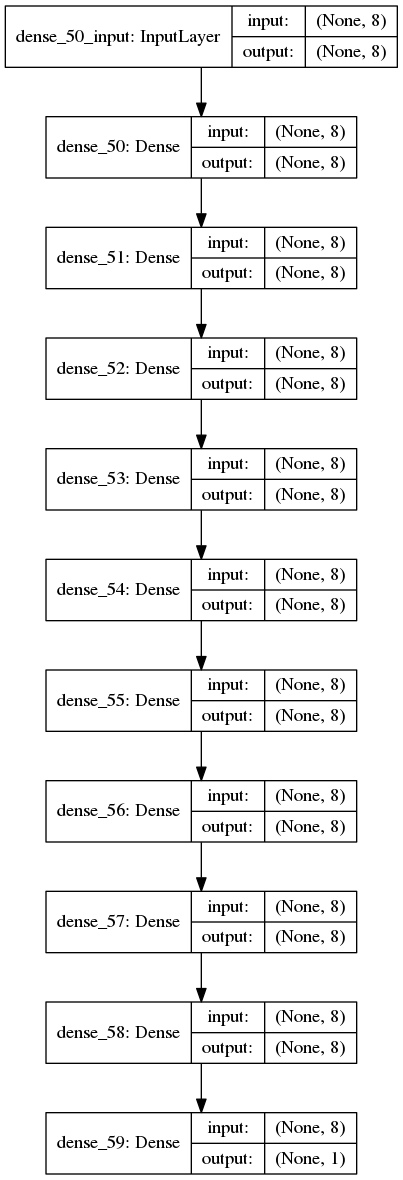

In [62]:
from keras.utils import plot_model
plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

In [63]:
y_pred = model.predict_classes(X_test)

In [64]:
score = model.evaluate(X_test, y_test,verbose=1)
score

254/254 [==============================] - 0s 1ms/step


[0.9712959448183616, 0.7401574850082397]